In [4]:
#Importing all the libraries needed

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf

In [5]:
# Importing the stock data and storing it in a dataframe

import json
import pandas as pd

tunisian_stock_market = 'Tunisian-Stock-Market.json'
with open(tunisian_stock_market, 'r') as json_file:
    
    json_data = json.load(json_file)

RawStockData = pd.DataFrame(json_data)
RawStockData.reset_index(inplace=True)
columnsToExclude = ['Code_isin','index']
RawStockData = RawStockData.drop(columns=columnsToExclude)
print(RawStockData.head(10))

KeyboardInterrupt: 

In [ ]:
#Choix d'une seule action(BNA dans notre cas)
RawStockData['Date'] = pd.to_datetime(RawStockData['Date'])
bna_data = RawStockData[RawStockData['Stock_name'] == 'BNA']

bna_data

,Date,Adj_Close,Stock_name,Adj_low,Adj_High,Volume
62,2021-11-04,7.320,BNA,7.220,7.320,6137.930176
141,2021-11-03,7.320,BNA,7.100,7.320,34433.000000
220,2021-11-02,7.310,BNA,7.200,7.320,24964.289062
299,2021-11-01,7.320,BNA,7.200,7.340,5781.819824
378,2021-10-29,7.340,BNA,7.300,7.340,6610.660156
...,...,...,...,...,...,...
198646,2011-01-07,11.305,BNA,11.210,11.320,52695.449219
198702,2011-01-06,11.283,BNA,11.173,11.393,43161.000000
198758,2011-01-05,11.349,BNA,10.989,11.349,86125.226562
198814,2011-01-04,11.129,BNA,10.952,11.129,105979.023438


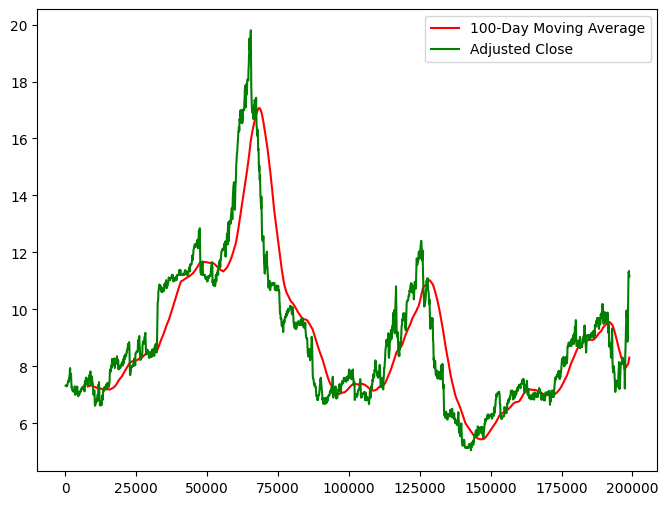

In [ ]:
#Moving Average of 100 days
ma_100_days = bna_data.Adj_Close.rolling(100).mean()

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='100-Day Moving Average')
plt.plot(bna_data.Adj_Close, 'g', label='Adjusted Close')

plt.legend()
plt.show()

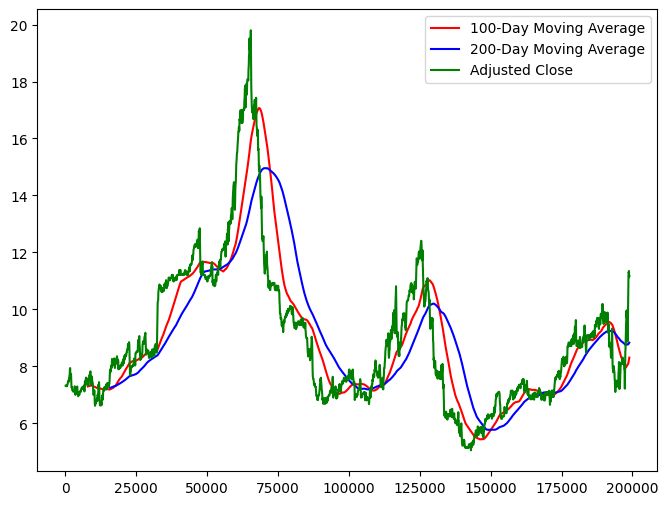

In [ ]:
#Moving Average of 200 days
ma_100_days = bna_data.Adj_Close.rolling(100).mean()
ma_200_days = bna_data.Adj_Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label='100-Day Moving Average')
plt.plot(ma_200_days, 'b', label='200-Day Moving Average')
plt.plot(bna_data.Adj_Close, 'g', label='Adjusted Close')

plt.legend()
plt.show()

In [ ]:
# Data Train and Data Test 

data_train = pd.DataFrame(bna_data.Adj_Close[0 : int(len(bna_data)*0.80)])
data_test = pd.DataFrame(bna_data.Adj_Close[int(len(bna_data)*0.80) : len(bna_data)])


In [ ]:
# Data Train lenght and Data Test length
data_train.shape[0] , data_test.shape[0]

(2151, 538)

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []
for i in range(100 , data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x,y = np.array(x) , np.array(y)

In [ ]:
from keras.layers import Dense,Dropout, LSTM 
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu' , return_sequences=True,
          input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60 , activation= 'relu' , return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 , activation= 'relu' , return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 , activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\namid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [ ]:
model.fit(x,y, epochs = 50 , batch_size = 32 , verbose = 1)

Epoch 1/50


65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0333
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0067
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0043
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 0.0045
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0039
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0033
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0032
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0033
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0031
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0033
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0024
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0021
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.0027
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0024
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0025
Epoch 16/50
65/

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days , data_test] , ignore_index=True)
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x = []
y = []
for i in range(100 , data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y = np.array(x) , np.array(y)

In [ ]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [ ]:
# Perform inverse scaling on predicted values
scale_factor = 1 / scaler.scale_
y_predict = y_predict * scale_factor

# Perform inverse scaling on original target values
y = y * scale_factor

# Debugging: Print intermediate results for inspection
print("Inverse scaled predicted values:")
print(y_predict)
print("Inverse scaled original target values:")
print(y)

NameError: name 'scaler' is not defined

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' , label = 'Predicted Price')
plt.plot(y , 'g' , label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'plt' is not defined